* https://www.bbc.co.uk/search?q=trade+war#page=2
   * This is similar to the Amazon Book case
* https://search.chinadailyasia.com/2804/index.html?search=trade%20war  
   * Switching page does not affect the URL text
* http://money.cnn.com/search/index.html?sortBy=date&primaryType=mixed&search=Search&query=trade%20war
   * Like China Daily



In [1]:
url = 'http://money.cnn.com/search/index.html?sortBy=date&primaryType=mixed&search=Search&query=trade%20war'

In [2]:
import pandas as pd

In [3]:
from splinter import Browser
import time

browser = Browser()
browser.visit(url)
time.sleep(2)

In [4]:
next_buttons = browser.find_by_css('#mixedpagination .pagingLinks li.ends.next')

In [5]:
next_buttons

In [6]:
next_buttons[0].click()

We can fit browser.html into BeautifulSoup and do the parsing as before. However, splinter already comes with a powerful element query/ manipulation function. In this example, we demo how to use that directly. Google "CSS selector" to learn the syntax first.

In [7]:
articles = []
for block in browser.find_by_css('#summaryList_mixed .summaryBlock'):
    article = {}
    h = block.find_by_css('.cnnHeadline a')
    article['headline'] = h.text
    article['url'] = h['href']
    article['date'] = block.find_by_css('span.cnnDateStamp').text
    articles.append(article)

In [8]:
pd.DataFrame(articles)

,date,headline,url
0,"Mar 28, 2018",,http://money.cnn.com/video/media/2018/03/27/st...
1,"Mar 27, 2018",Dow drops 345 points as tech stocks get crushed,http://money.cnn.com/2018/03/27/investing/dow-...
2,"Mar 27, 2018",The US needs to borrow almost $300 billion thi...,http://money.cnn.com/2018/03/27/investing/us-d...
3,"Mar 27, 2018",Trade fears ease; Big pharma deal; Facebook un...,http://money.cnn.com/2018/03/27/investing/prem...
4,"Mar 27, 2018",How Remington became an icon among American gu...,http://money.cnn.com/2018/03/26/news/companies...
5,"Mar 26, 2018",Wall Street's head-spinning reaction to trade ...,http://money.cnn.com/2018/03/26/investing/dow-...
6,"Mar 26, 2018",PACIFIC for March 26: Apple fires on Facebook,http://money.cnn.com/2018/03/26/technology/pac...
7,"Mar 26, 2018",The US and China are in talks to try to avoid ...,http://money.cnn.com/2018/03/26/news/economy/c...
8,"Mar 26, 2018",Dow surges 669 points as trade war fears cool,http://money.cnn.com/2018/03/26/investing/stoc...
9,"Mar 26, 2018",Tariff fallout; China's oil trade; Remington b...,http://money.cnn.com/2018/03/26/investing/prem...


In [9]:
browser.quit()

In [10]:
def get_articles_from_browser(b):
    articles = []
    for block in b.find_by_css('#summaryList_mixed .summaryBlock'):
        article = {}
        h = block.find_by_css('.cnnHeadline a')
        article['headline'] = h.text
        article['url'] = h['href']
        article['date'] = block.find_by_css('span.cnnDateStamp').text
        articles.append(article)
    return articles

In [11]:
# Launch the initial page
browser = Browser()
browser.visit(url)
time.sleep(2)

In [12]:
all_page_articles = []
for i in range(50):
    time.sleep(0.5)
    try:
        new_articles = get_articles_from_browser(browser)
        all_page_articles.extend(new_articles)
        next_buttons = browser.find_by_css('#mixedpagination .pagingLinks li.ends.next')
        next_buttons[0].click()
    except Exception as e:
        print(e)
        print('Error on page %s' % i)

In [13]:
df = pd.DataFrame(all_page_articles)
df

,date,headline,url
0,"Mar 28, 2018",,http://money.cnn.com/video/media/2018/03/27/st...
1,"Mar 27, 2018",Dow drops 345 points as tech stocks get crushed,http://money.cnn.com/2018/03/27/investing/dow-...
2,"Mar 27, 2018",The US needs to borrow almost $300 billion thi...,http://money.cnn.com/2018/03/27/investing/us-d...
3,"Mar 27, 2018",Trade fears ease; Big pharma deal; Facebook un...,http://money.cnn.com/2018/03/27/investing/prem...
4,"Mar 27, 2018",How Remington became an icon among American gu...,http://money.cnn.com/2018/03/26/news/companies...
5,"Mar 26, 2018",Wall Street's head-spinning reaction to trade ...,http://money.cnn.com/2018/03/26/investing/dow-...
6,"Mar 26, 2018",PACIFIC for March 26: Apple fires on Facebook,http://money.cnn.com/2018/03/26/technology/pac...
7,"Mar 26, 2018",The US and China are in talks to try to avoid ...,http://money.cnn.com/2018/03/26/news/economy/c...
8,"Mar 26, 2018",Dow surges 669 points as trade war fears cool,http://money.cnn.com/2018/03/26/investing/stoc...
9,"Mar 26, 2018",Tariff fallout; China's oil trade; Remington b...,http://money.cnn.com/2018/03/26/investing/prem...


In [14]:
from dateutil import parser

In [15]:
df['dt'] = df['date'].apply(lambda t: parser.parse(t))

In [19]:
from matplotlib import pyplot as plt

Text(0.5,1,'# of news reports of "trade war" on CNN')

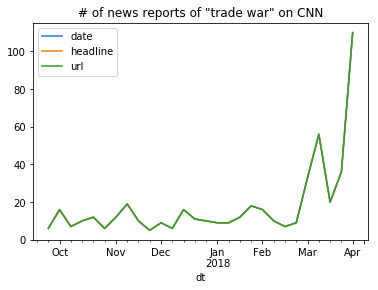

In [20]:
df.set_index('dt').resample('1w').aggregate('count').plot()
plt.title('# of news reports of "trade war" on CNN')